## Scrape the Location Counts

### 1. Use the beautifulsoup library to scrape the data (from the link above) on state names and corresponding number of store locations, for the following chains:
* Starbucks

* Dunkin’ Donuts

In [68]:
import pandas as pd 
import requests
from bs4 import BeautifulSoup

In [69]:
# starbucks
response = requests.get("https://worldpopulationreview.com/state-rankings/starbucks-stores-by-state")
starbucks_soup = BeautifulSoup(response.content, "html.parser")
starbucks_tables = starbucks_soup.find_all("table", class_ = "wpr-table")[0]


In [70]:
# create empty lists for the dictionaries
starbucks_rows = []
states_list = []

for th in starbucks_tables.find_all("th")[4:]:
    states = th.get_text(strip = True)
    states_list.append(states)

for i, tr in enumerate(starbucks_tables.find_all("tr")[1:]):
    state = states_list[i]

    cells = tr.find_all("td")
    
    # extract cells for stores in 2023, 2021, and 2024
    stores2023 = cells[0].get_text(strip=True)
    stores2021 = cells[1].get_text(strip=True)
    stores2024 = cells[2].get_text(strip=True)

    # append the rows with the dictionaries
    starbucks_rows.append({
        "State": state,
        "Year": 2023,
        "Store Count": stores2023, 
        "Company": "Starbucks"
    })
    starbucks_rows.append({
        "State": state,
        "Year": 2021,
        "Store Count": stores2021,
        "Company": "Starbucks"
    })
    starbucks_rows.append({
        "State": state,
        "Year": 2024,
        "Store Count": stores2024, 
        "Company": "Starbucks"
    })

# convert into a data frame
df = pd.DataFrame(starbucks_rows)

In [71]:
#dunkin
dunkin_response = requests.get("https://worldpopulationreview.com/state-rankings/dunkin-donuts-by-state")
dunkin_soup = BeautifulSoup(dunkin_response.content, "html.parser")
dunkin_table = dunkin_soup.find("table", class_ = "wpr-table")

In [72]:
# create empty lists for the dictionaries
dunkin_rows = []
states_list = []

for th in dunkin_table.find_all("th")[3:]:
    states = th.get_text(strip = True)
    states_list.append(states)

for i, tr in enumerate(dunkin_table.find_all("tr")[1:]):
    state = states_list[i]

    cells = tr.find_all("td")

    # extract cells for stores
    dunkin_stores2024 = cells[0].get_text(strip=True)
    dunkin_stores2023 = cells[1].get_text(strip=True)

    #append the rows with the dictionaries
    dunkin_rows.append({
        "State": state,
        "Year": 2024,
        "Store Count": dunkin_stores2024,
        "Company": "Dunkin"
    })
    dunkin_rows.append({
        "State": state,
        "Year": 2023,
        "Store Count": dunkin_stores2023,
        "Company": "Dunkin"
    })
# convert to data frame
df = pd.DataFrame(dunkin_rows)

### 2. Parse, merge and tidy your data. Think carefully about what the tidy version of this dataset is with multiple years represented on the website.

In [73]:
# rename the dataframes
df_dunkin = pd.DataFrame(dunkin_rows)
df_starbucks = pd.DataFrame(starbucks_rows)

#merge two data frames
coffee = pd.merge(df_dunkin, df_starbucks, on=["State", "Year", "Company", "Store Count"], how="outer")

## Supplemental Data

### 4. Scrape the state names and populations from this wikipedia page. Merge these data with your coffee dataset.

In [74]:
pop_response = requests.get("https://simple.wikipedia.org/wiki/List_of_U.S._states_by_population")
pop_soup = BeautifulSoup(pop_response.content, "html.parser")
pop_table = pop_soup.find("table", class_ = "wikitable")

pop_rows = []

for tr in pop_table.find_all("tr")[1:]:
    cells = tr.find_all('td')
    if len(cells) >= 3:
        state = cells[2].get_text(strip = True)
        population = cells[3].get_text(strip = True)


        pop_rows.append({
        "State": state,
        "Population": population})

# convert to data frame
pop_df = pd.DataFrame(pop_rows)

# merge two data frames
coffee_new = pd.merge(coffee, pop_df, on="State", how = "outer")

### 5. Find the revenue, stock price, or your financial metric of choice for each of the companies listed above (if you can find a website to scrape these from that’s great!…but it’s okay if you manually enter these). Merge these values into your big dataset. Note: these values may be repeated for each state.

In [75]:
# stock prices
# 97.31 for starbucks
# 106.48 for dunkin 
financial_data = {
    "Company": ["Starbucks", "Dunkin", "Starbucks", "Dunkin", "Starbucks", "Dunkin"],
    "Stock Price": [97.31, 106.48, 95.88, 106.48, 116.38, 106.48], 
    "Year": [2024, 2024, 2023, 2023, 2021, 2021]
}

financial_df = pd.DataFrame(financial_data)

financial_coffee = pd.merge(coffee_new, financial_df, on = ["Company", "Year"], how = "outer")
financial_coffee = financial_coffee.sort_values(by = "State").reset_index(drop=True)

### 6. Create a region variable in your dataset according to the scheme on this wikipedia page: Northeast, Midwest, South, West. You do not need to scrape this information.

In [76]:
#regions for us
regions = {
    "Connecticut": "Northeast",
    "Maine": "Northeast",
    "Massachusetts": "Northeast",
    "New Hampshire": "Northeast",
    "Rhode Island": "Northeast",
    "Vermont": "Northeast",
    "New Jersey": "Northeast",
    "New York": "Northeast",
    "Pennsylvania": "Northeast",
    "Illinois": "Midwest",
    "Indiana": "Midwest",
    "Michigan": "Midwest",
    "Ohio": "Midwest",
    "Wisconsin": "Midwest",
    "Iowa": "Midwest",
    "Kansas": "Midwest",
    "Minnesota": "Midwest",
    "Missouri": "Midwest",
    "Nebraska": "Midwest",
    "North Dakota": "Midwest",
    "South Dakota": "Midwest",
    "Delaware": "South",
    "Florida": "South",
    "Georgia": "South",
    "Maryland": "South",
    "North Carolina": "South",
    "South Carolina": "South",
    "Virginia": "South",
    "District of Columbia": "South",
    "West Virginia": "South",
    "Alabama": "South",
    "Kentucky": "South",
    "Mississippi": "South",
    "Tennessee": "South",
    "Arkansas": "South",
    "Louisiana": "South",
    "Oklahoma": "South",
    "Texas": "South",
    "Arizona": "West",
    "Colorado": "West",
    "Idaho": "West",
    "Montana": "West", 
    "Nevada": "West", 
    "New Mexico": "West",
    "Utah": "West",
    "Wyoming": "West",
    "Alaska": "West",
    "California": "West",
    "Hawaii": "West",
    "Oregon": "West",
    "Washington": "West",
    "American Samoa": "Other",
    "Guam": "Other",
    "Northern Mariana Islands": "Other",
    "Puerto Rico": "Other",
    "U.S. Virgin Islands": "Other",
    "Contiguous United States": "Other",
    "Fifty States + D.C.": "Other"
}

financial_coffee["Regions"] = financial_coffee["State"].map(regions)

In [77]:
financial_coffee["Store Count"] = pd.to_numeric(financial_coffee["Store Count"], errors='coerce')

## Analyze

### 7. Assess and comment on the prevalence of each chain. Some questions to consider (you don’t need to answer all of these and you may come up with your own):

Based on the dataframe, we cannot fully compare the two chains becasue the Starbucks data includes information on years 2021, 2023, and 2024. Dunkin contains information on years 2023 and 2024. A conclusion could be drawn that population is somewhat correlated witht the number of Starbucks Stores. For example, Florida has the highest number of Starbucks stores at 892 stores for 2024 with a population of 21 million, while Vermont has the lowest amount of stores with 8 for 2023 with a population of 643k. The same conclusion could be drawn for Dunkin Stores with Florida having the highest number of stores at 909 with a population of 21 million, while Wyoming has 1 store with a population of 576k. Dunkin is more popular in the South and Northeast regions with there being a higher number of stores in those regions than the others. Starbucks is more popular in the West and South regions with there being a higher number of stores in those regions than others. An important note on the financial metric is that Dunkin is no longer publically traded, so the stock price values used is the same value for every year since their last listed stock price in 2020. For Starbucks, after 2021, the price for stock dropped for the 2023 stock price and has increased slightly from 2023 to 2024.

C:\Users\achur\Downloads\python\Lib\site-packages\plotnine\layer.py:364: PlotnineWarning: geom_point : Removed 4 rows containing missing values.


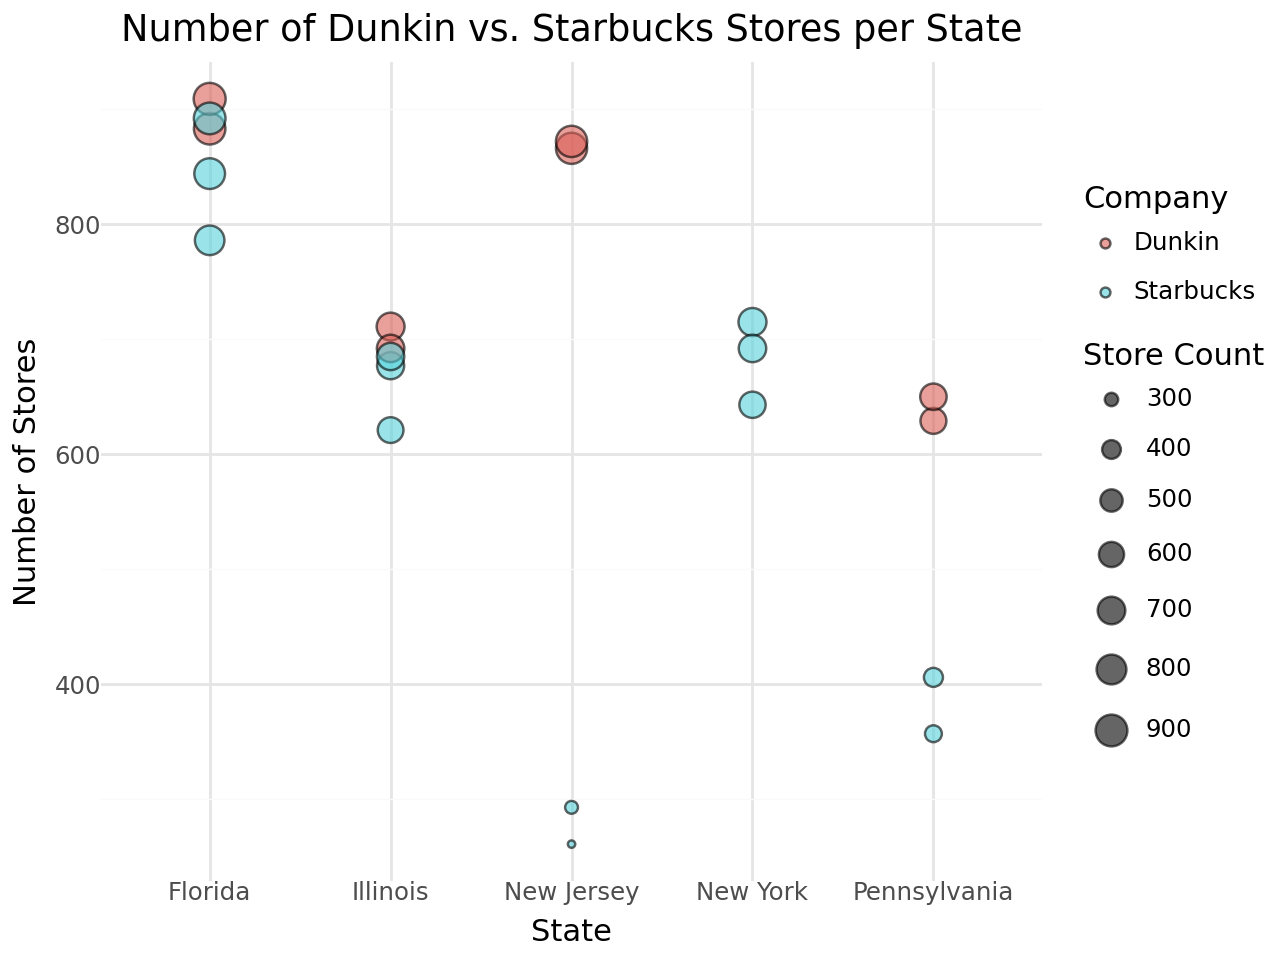

In [78]:
from plotnine import *

state = (
    financial_coffee.groupby("State")
    .agg(mean_vol = ("Store Count", "mean"))
    .nlargest(5, "mean_vol")
    .reset_index()
)
financial_coffee2 = financial_coffee[financial_coffee["State"].isin(state["State"])]

(ggplot(financial_coffee2, aes(x = "State", y = "Store Count", fill = "Company", size = "Store Count"))
    + geom_point(alpha = 0.6, color = "black", stroke = 0.5)
    + labs(title = "Number of Dunkin vs. Starbucks Stores per State", x = "State", y = "Number of Stores")
    + theme_minimal()
    )

C:\Users\achur\Downloads\python\Lib\site-packages\plotnine\scales\scale_size.py:51: PlotnineWarning: Using size for a discrete variable is not advised.
C:\Users\achur\Downloads\python\Lib\site-packages\plotnine\layer.py:364: PlotnineWarning: geom_point : Removed 4 rows containing missing values.


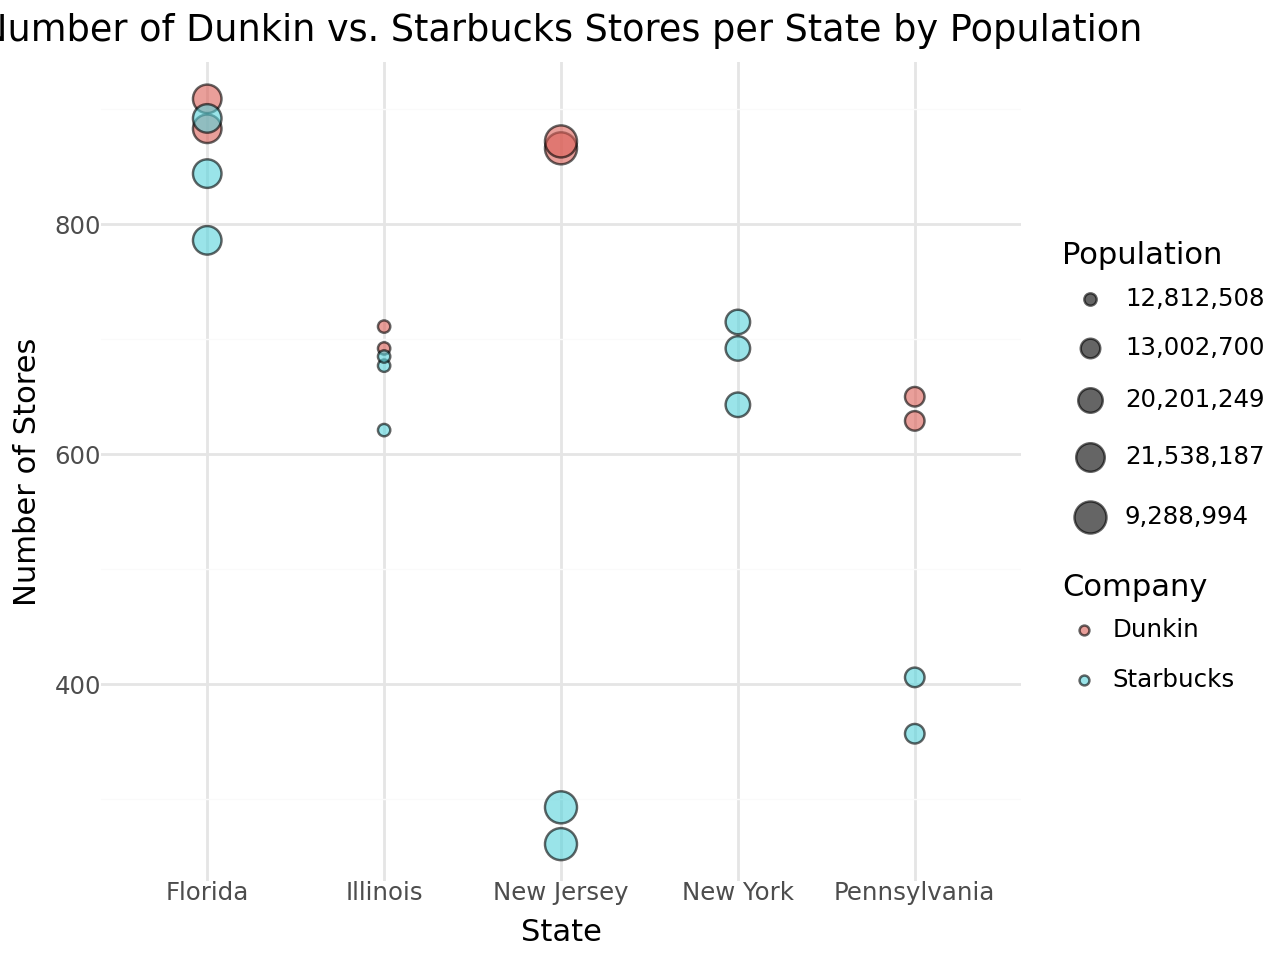

In [79]:
from plotnine import *

state = (
    financial_coffee.groupby("State")
    .agg(mean_vol = ("Store Count", "mean"))
    .nlargest(5, "mean_vol")
    .reset_index()
)
financial_coffee2 = financial_coffee[financial_coffee["State"].isin(state["State"])]

(ggplot(financial_coffee2, aes(x = "State", y = "Store Count", size = "Population", fill = "Company"))
    + geom_point(alpha = 0.6, color = "black", stroke = 0.5)
    + labs(title = "Number of Dunkin vs. Starbucks Stores per State by Population", x = "State", y = "Number of Stores")
    + theme_minimal()
    )

C:\Users\achur\Downloads\python\Lib\site-packages\plotnine\layer.py:344: PlotnineWarning: position_stack : Removed 63 rows containing missing values.


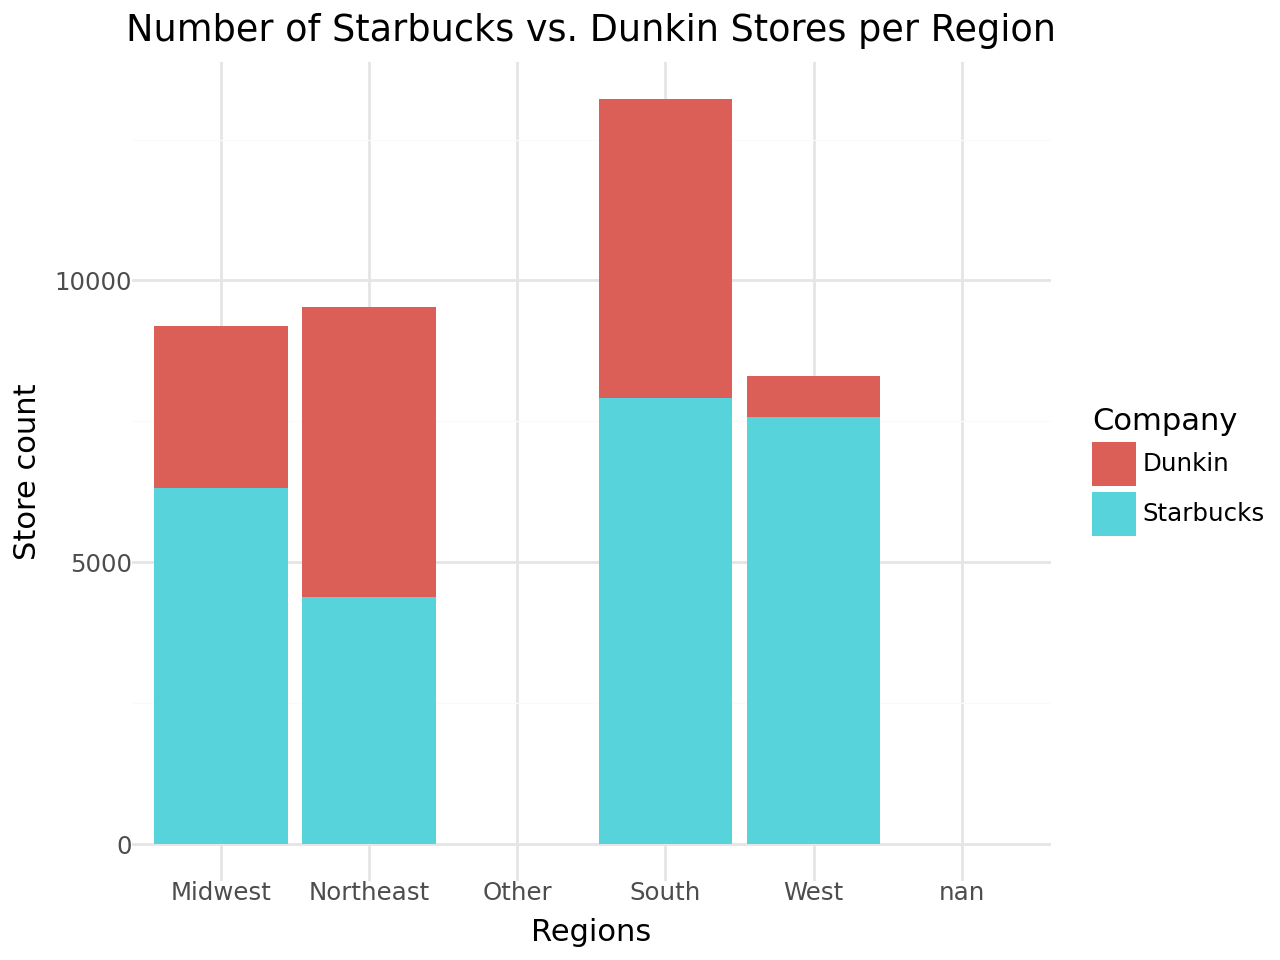

In [80]:
from plotnine import *
financial_coffee["Regions"].dropna()

(ggplot(financial_coffee, aes(x = "Regions", y = "Store Count", fill = "Company"))
    + geom_bar(stat = 'identity')
    + labs(title = "Number of Starbucks vs. Dunkin Stores per Region", x = "Regions", y = "Store count")
    + theme_minimal()
    )

C:\Users\achur\Downloads\python\Lib\site-packages\plotnine\layer.py:284: PlotnineWarning: stat_density : Removed 9 rows containing non-finite values.


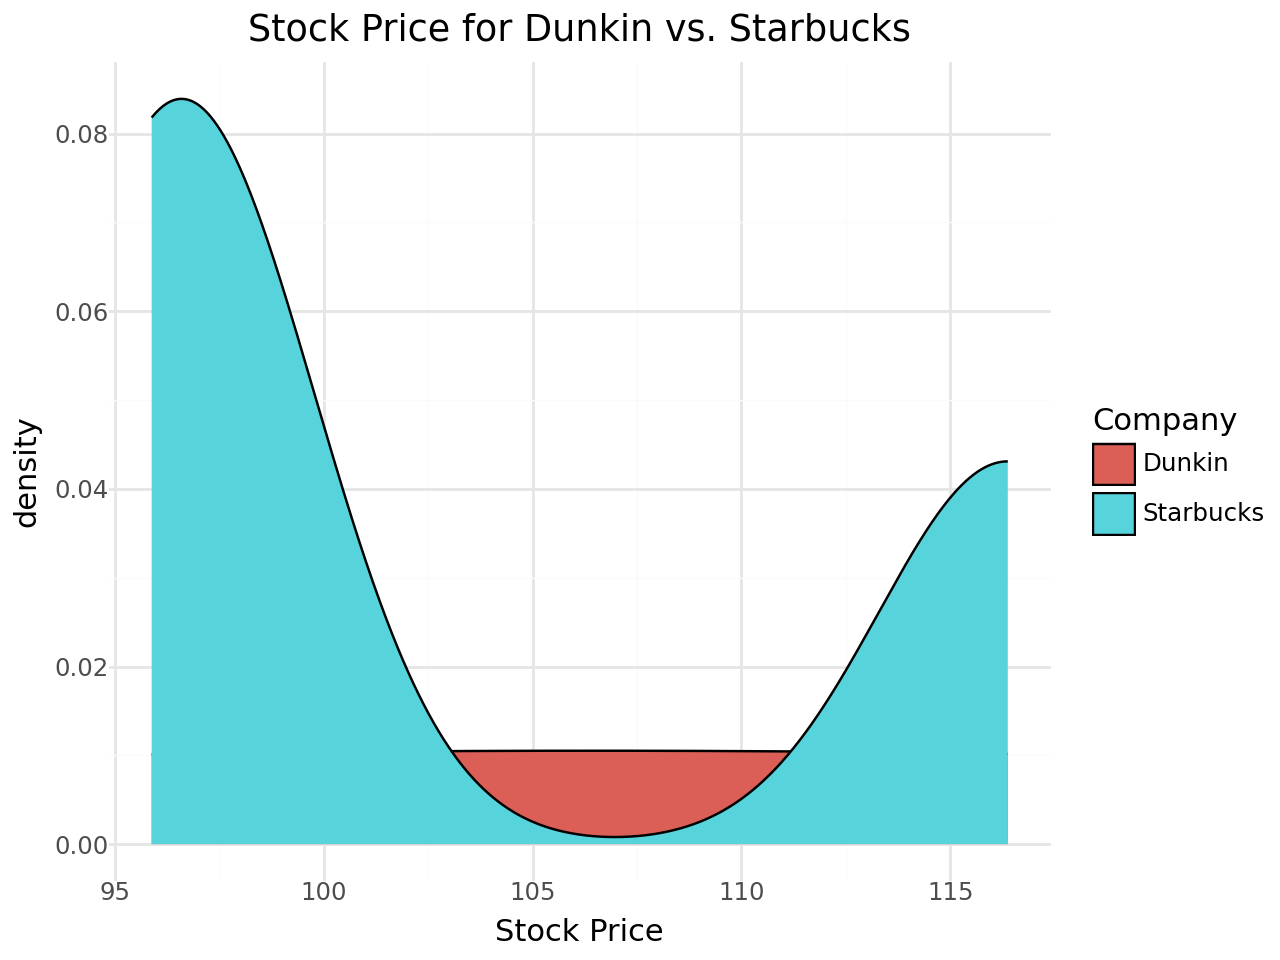

In [92]:
(ggplot(financial_coffee, aes(x = "Stock Price", fill = "Company"))
    + geom_density()
    + labs(title = "Stock Price for Dunkin vs. Starbucks", x = "Stock Price")
    + theme_minimal()
)

## Automate

### Convert your code for Exercises 1-3 above to a function that takes a single argument: the URL. This function should

* Scrape the information on state names and corresponding number of store locations on the webpage specified (assume the page has a table in the same form and placement as the ones you scraped above)

* Extract the name of the company from either the URL specified or the webpage (assume the URL will have the same format as the ones used above)

* Return a clean, organized and tidy dataset. Find a page other than Starbucks and Dunkin’ Donuts to test this on to confirm that it works. It’s fine if this is not related to coffee.

In [82]:
import re
def scrape_store_data(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.content, "html.parser")
    company_name = re.search(r'state-rankings/(.*?)-by-state', url).group(1).replace('-', ' ').title()
    table = soup.find('table', class_ = 'wpr-table')
    states_list = [th.get_text(strip = True) for th in table.find_all('th')[3:]]
    headers = []
    rows = []
    states_list = []
   
   # add state names to state list
    for th in table.find_all('th', class_ = "datatable-th"):
        header = th.get_text(strip = True)
        headers.append(header)
    index = len(table.find_all('th', class_ = "datatable-th"))

    for th in table.find_all('th')[index:]:
        states = th.get_text(strip = True)
        states_list.append(states)

    for i, tr in enumerate(table.find_all('tr')[1:]):
        state = states_list[i]
        cells = tr.find_all('td')
        row_data = {"State": states_list[i]}
        for j, cell in enumerate(cells):
            cell_tag = cell.find("a") or cell
            row_data[headers[j + 1]] = cell_tag.get_text(strip =True)
        rows.append(row_data)
    df = pd.DataFrame(rows)
    df_long = df.melt(id_vars = "State", var_name = "Year", value_name = "Count")
    df_long["Store"] = df_long["Year"].apply(lambda x: x.split()[0])
    df_long["Year"] = df_long["Year"].apply(lambda x: re.search(r'(\d{4})', x).group(0) if re.search(r'(\d{4})', x) else None)

    
    return df_long

In [83]:
# test function
url = "https://worldpopulationreview.com/state-rankings/chick-fil-a-by-state"
scrape_store_data(url)

,State,Year,Count,Store
0,Texas,2024,489,Chick-Fil-A
1,Florida,2024,334,Chick-Fil-A
2,Georgia,2024,327,Chick-Fil-A
3,California,2024,243,Chick-Fil-A
4,North Carolina,2024,174,Chick-Fil-A
...,...,...,...,...
97,Maine,2023,2,Chick-Fil-A
98,Rhode Island,2023,2,Chick-Fil-A
99,Wyoming,2023,1,Chick-Fil-A
100,Alaska,2023,,Chick-Fil-A


In [84]:
# test function
url = "https://worldpopulationreview.com/state-rankings/starbucks-stores-by-state"
scrape_store_data(url)

,State,Year,Count,Store
0,California,2023,"3,080",Starbucks
1,Texas,2023,"1,346",Starbucks
2,Florida,2023,844,Starbucks
3,Washington,2023,741,Starbucks
4,New York,2023,692,Starbucks
...,...,...,...,...
148,South Dakota,2024,,Starbucks
149,West Virginia,2024,,Starbucks
150,Wyoming,2024,,Starbucks
151,North Dakota,2024,,Starbucks


### Appendix and References

https://worldpopulationreview.com/state-rankings/starbucks-stores-by-state

https://worldpopulationreview.com/state-rankings/dunkin-donuts-by-state

https://simple.wikipedia.org/wiki/List_of_U.S._states_by_population

https://worldpopulationreview.com/state-rankings/chick-fil-a-by-state

https://en.wikipedia.org/wiki/List_of_regions_of_the_United_States 

https://finance.yahoo.com/quote/SBUX/

https://www.investing.com/equities/dunkin-brands-group


Generative A.I. Statement: Chat-GPT was used to suggest changes in code to debug errors. An example of errors include, incorrect syntax, incorrect usage of parameters for plots, making suggestions to fix parameters to resolve the error in code. Chat-GPT was only used to resolve errors in already hand written code. 